In [37]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [16]:
round(app_train['AMT_INCOME_TOTAL'].std(),2)

237123.15

In [18]:
app_train['AMT_INCOME_TOTAL'].describe().round(1)

count       307511.0
mean        168797.9
std         237123.1
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [23]:
app_train[['AMT_INCOME_TOTAL','AMT_CREDIT']].cor()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,5.622739e+10,1.497168e+10
AMT_CREDIT,1.497168e+10,1.619988e+11


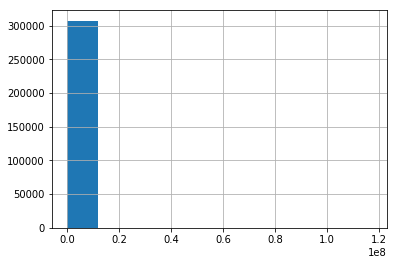

In [26]:
hist  = app_train['AMT_INCOME_TOTAL'].hist()
hist

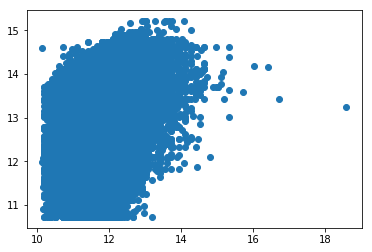

In [39]:
plt.scatter(np.log(app_train['AMT_INCOME_TOTAL']+1),np.log(app_train['AMT_CREDIT']+1))

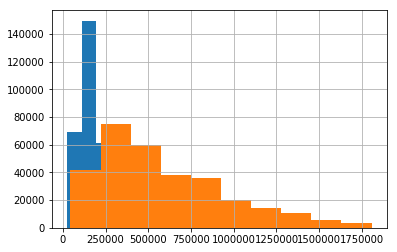

In [32]:
income = app_train['AMT_INCOME_TOTAL']
credit = app_train['AMT_CREDIT']
income = income.where((income < income.mean()+3*income.std()) & (income > income.mean() - 3*income.std()))
income.hist()
credit = credit.where((credit < credit.mean()+3*credit.std()) & (credit > credit.mean() - 3*credit.std()))
credit.hist()

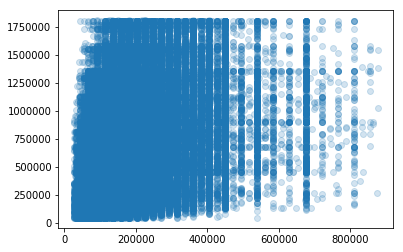

In [34]:
plt.scatter(income, credit, alpha = 0.2)

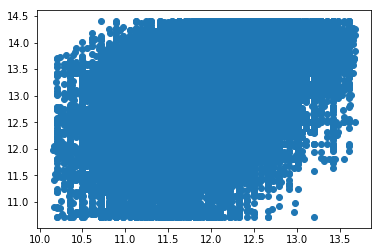

In [40]:
plt.scatter(np.log(income),np.log(credit))